In [1]:
%load_ext autoreload
%autoreload 2

import plotter
import lmpsetup

# Summary

This week we want to simulate and go quantitative for all the multichain cases : 


1. Generate **more chain simulations** DONE 


2. **Dimers and interaction effects** DONE


3. Effect of **dt on simulation energy** (Gil) RUNNING


4. **Optimization** end TO TEST


5. Parallelize and find **interchain contacts** and **density profiles** TO TEST


6. **HOOMD testing** TO DO NEXT WEEK POSSIBLY


7. **TDP** mutagenesis (Reweighting to be done)

### 1. Generate **more chain simulations** 

It seemed like **12D is not converging properly for the REX case** from last week. The idea now is then to **move away from using REX**. Particularly, we'll run everything again, for every construct, but in just 2 temperatures at 16 cores each to get more sample. I would also like to run **150 chains at CSUC**. The interesting temperatures (for a start) will be 300 and 450.

In [2]:
temperatures = [300,450]

In [41]:
# 12D at perdius
D12_loc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x50', 
                            temper=False, 
                            protein='12D_CPEB4_D4', 
                            chains=50)
D12_loc.temperatures = temperatures
D12_loc.processors=16
D12_loc.write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x50 for 12D_CPEB4_D4     ║
║--------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                           ║
║       - Chains = 50                                                                                    ║
║       - Ionic Strength (mM) = 0.1                                                                      ║
║       - Medium Permittivity = 80.0                                                                     ║
║       - Temperatures (K) = [300, 450]                                                                  ║
║       - HPS Scale = 1.0                                                                                ║
╚════════════════════════════════════

In [3]:
# 12D at CSUC
D12_csuc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x150', 
                            temper=False, 
                            protein='12D_CPEB4_D4', 
                            chains=150)
D12_csuc.temperatures = temperatures
D12_csuc.processors=16
D12_csuc.write_hps_files(qsub=False, slurm=True)

╔═════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x150 for 12D_CPEB4_D4     ║
║---------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                            ║
║       - Chains = 150                                                                                    ║
║       - Ionic Strength (mM) = 0.1                                                                       ║
║       - Medium Permittivity = 80.0                                                                      ║
║       - Temperatures (K) = [300, 450]                                                                   ║
║       - HPS Scale = 1.0                                                                                 ║
╚═══════════════════════════

In [49]:
# 7D at perdius
D7_loc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x50', 
                            temper=False, 
                            protein='7D_CPEB4', 
                            chains=50)
D7_loc.temperatures = temperatures
D7_loc.processors=16
D7_loc.write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x50 for 7D_CPEB4     ║
║------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                   ║
║       - Chains = 50                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                              ║
║       - Medium Permittivity = 80.0                                                             ║
║       - Temperatures (K) = [300, 450]                                                          ║
║       - HPS Scale = 1.0                                                                        ║
╚════════════════════════════════════════════════════════════════════════════════════════════════╝


In [4]:
# 7D at CSUC
D7_csuc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x150', 
                            temper=False, 
                            protein='7D_CPEB4', 
                            chains=150)
D7_csuc.temperatures = temperatures
D7_csuc.processors=16
D7_csuc.write_hps_files(qsub=False, slurm=True)

╔═════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x150 for 7D_CPEB4     ║
║-------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                    ║
║       - Chains = 150                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                               ║
║       - Medium Permittivity = 80.0                                                              ║
║       - Temperatures (K) = [300, 450]                                                           ║
║       - HPS Scale = 1.0                                                                         ║
╚═════════════════════════════════════════════════════════════════════════════════════════════════╝


In [45]:
# D4 at perdius
D4_loc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x50', 
                            temper=False, 
                            protein='CPEB4_D4', 
                            chains=50)
D4_loc.temperatures = temperatures
D4_loc.processors=16
D4_loc.write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x50 for CPEB4_D4     ║
║------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                   ║
║       - Chains = 50                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                              ║
║       - Medium Permittivity = 80.0                                                             ║
║       - Temperatures (K) = [300, 450]                                                          ║
║       - HPS Scale = 1.0                                                                        ║
╚════════════════════════════════════════════════════════════════════════════════════════════════╝


In [5]:
# D4 at CSUC
D4_csuc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x150', 
                            temper=False, 
                            protein='CPEB4_D4', 
                            chains=150)
D4_csuc.temperatures = temperatures
D4_csuc.processors=16
D4_csuc.write_hps_files(qsub=False, slurm=True)

╔═════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x150 for CPEB4_D4     ║
║-------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                    ║
║       - Chains = 150                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                               ║
║       - Medium Permittivity = 80.0                                                              ║
║       - Temperatures (K) = [300, 450]                                                           ║
║       - HPS Scale = 1.0                                                                         ║
╚═════════════════════════════════════════════════════════════════════════════════════════════════╝


In [47]:
# WT at perdius
WT_loc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4x50', 
                            temper=False, 
                            protein='CPEB4', 
                            chains=50)
WT_loc.temperatures = temperatures
WT_loc.processors=16
WT_loc.write_hps_files()

╔══════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4x50 for CPEB4     ║
║------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                             ║
║       - Chains = 50                                                                      ║
║       - Ionic Strength (mM) = 0.1                                                        ║
║       - Medium Permittivity = 80.0                                                       ║
║       - Temperatures (K) = [300, 450]                                                    ║
║       - HPS Scale = 1.0                                                                  ║
╚══════════════════════════════════════════════════════════════════════════════════════════╝


In [6]:
# WT at CSUC
WT_csuc = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4x150', 
                            temper=False, 
                            protein='CPEB4', 
                            chains=150)
WT_csuc.temperatures = temperatures
WT_csuc.processors=16
WT_csuc.write_hps_files(qsub=False, slurm=True)

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4x150 for CPEB4     ║
║-------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                              ║
║       - Chains = 150                                                                      ║
║       - Ionic Strength (mM) = 0.1                                                         ║
║       - Medium Permittivity = 80.0                                                        ║
║       - Temperatures (K) = [300, 450]                                                     ║
║       - HPS Scale = 1.0                                                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝


### 2. **Dimers and interaction effects**

We already have a dimeric run for CPEB4 WT at '/home/adria/perdiux/prod/lammps/dignon/CPEB4x2'. The rest of the variants will be sent to CSUC as perdius are full :

In [59]:
# DIMERIC 12D
d12D = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x2', temper=True, chains=2, protein='12D_CPEB4_D4')
d12D.save = 50000
d12D.t = 100000000
d12D.temperatures = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]
d12D.write_hps_files(slurm=True, qsub=False)

╔═══════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x2 for 12D_CPEB4_D4     ║
║-------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                          ║
║       - Chains = 2                                                                                    ║
║       - Ionic Strength (mM) = 0.1                                                                     ║
║       - Medium Permittivity = 80.0                                                                    ║
║       - Temperatures (K) = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]    ║
║       - HPS Scale = 1.0                                                                               ║
╚══════════════════════

In [60]:
# DIMERIC 7D
d7D = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x2', temper=True, chains=2, protein='7D_CPEB4')
d7D.save = 50000
d7D.t = 100000000
d7D.temperatures = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]
d7D.write_hps_files(slurm=True, qsub=False)

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x2 for 7D_CPEB4     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Chains = 2                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]    ║
║       - HPS Scale = 1.0                                                                       ║
╚══════════════════════════════════════════════════════════════════════════════════════

In [61]:
# DIMERIC D4
dD4 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x2', temper=True, chains=2, protein='CPEB4_D4')
dD4.save = 50000
dD4.t = 100000000
dD4.temperatures = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]
dD4.write_hps_files(slurm=True, qsub=False)

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x2 for CPEB4_D4     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Chains = 2                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]    ║
║       - HPS Scale = 1.0                                                                       ║
╚══════════════════════════════════════════════════════════════════════════════════════

In [3]:
%load_ext autoreload
%autoreload 2
import lmpsetup 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# DIMERIC D4
dD4 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4x2', temper=True, chains=2, protein='CPEB4')
dD4.save = 50000
dD4.t = 100000000
dD4.temperatures = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]
dD4.write_hps_files(slurm=True, qsub=False)

╔═════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CPEB4x2 for CPEB4     ║
║-----------------------------------------------------------------------------------------║
║   PARAMETERS                                                                            ║
║       - Chains = 2                                                                      ║
║       - Ionic Strength (mM) = 0.1                                                       ║
║       - Medium Permittivity = 80.0                                                      ║
║       - Temperatures (K) = [300.0, 318.18, 336.36, 354.55, 372.73, 390.91, 409.09, 427.27, 445.45, 463.64, 481.82, 500.0]    ║
║       - HPS Scale = 1.0                                                                 ║
╚═════════════════════════════════════════════════════════════════════════════════════════╝


Compare first the radius of Gyration to that of the single chain for each construct. Contacts will be calculated 

### 3. Effect of **dt on simulation energy** (Gil)

**Consider first the case where K = 9.6 (value used until today)**

In [57]:
import os
import lmpsetup

dts = [10,15,20,25,30,50,100, 200]

for dt in dts:
    d = os.path.join('/home/adria/perdiux/prod/lammps/dignon/DT/NVE/K9.6',str(dt))
    dtter = lmpsetup.LMPSetup(oliba_wd=d, temper=False, protein='CPEB4', chains=1)
    dtter.processors = 2
    dtter.dt = dt
    dtter.t = 100000000
    dtter.save = 2000
    dtter.temperatures = [300]
    dtter.write_hps_files(silent=True)

Now also, consider the cases where **K is 10 times greater and 10 times smaller**, for the same dt's (NOTE: K is not modified here in the notebook, but is made by modifying the template (hard-coding))

In [58]:
import os
import lmpsetup
import math

dts = [10,15,20,25,30,50,100,200]

for dt in dts:
    d = os.path.join('/home/adria/perdiux/prod/lammps/dignon/DT/NVE/K96',str(dt))
    dtter = lmpsetup.LMPSetup(oliba_wd=d, temper=False, protein='CPEB4', chains=1)
    dtter.processors = 2
    dtter.dt = dt/math.sqrt(10)
    dtter.t = 100000000
    dtter.save = 2000
    dtter.temperatures = [300]
    dtter.write_hps_files(silent=True)

In [66]:
import os
import lmpsetup

dts = [10,15,20,25,30,50,100, 200]

for dt in dts:
    d = os.path.join('/home/adria/perdiux/prod/lammps/dignon/DT/NVE/K0.96',str(dt))
    dtter = lmpsetup.LMPSetup(oliba_wd=d, temper=False, protein='CPEB4', chains=1)
    dtter.processors = 2
    dtter.dt = dt*math.sqrt(10)
    dtter.t = 100000000
    dtter.save = 2000
    dtter.temperatures = [300]
    dtter.write_hps_files(silent=True)

I will also try with a FENE to see what happens. Also done hardcoded!

In [8]:
import os
import lmpsetup

dts = [10,15,20,25,30,50,100, 200]

for dt in dts:
    d = os.path.join('/home/adria/perdiux/prod/lammps/dignon/DT/FENE',str(dt))
    dtter = lmpsetup.LMPSetup(oliba_wd=d, temper=False, protein='CPEB4', chains=1)
    dtter.processors = 2
    dtter.dt = dt
    dtter.t = 100000000
    dtter.save = 500
    dtter.temperatures = [300]
    dtter.write_hps_files(silent=True)

**The results are :**

> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 0.97% for CPEB4. Ran 970500 steps for a total of 1942 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


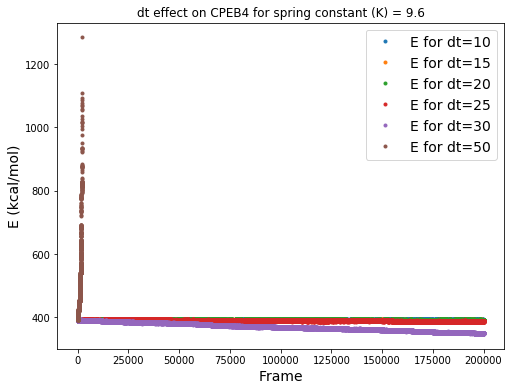

In [101]:
import analysis 
import numpy as np
import matplotlib.pyplot as plt

# dts = [10,15,20,25,30,50, 100, 200]
dts = [10,15,20,25,30,50]
Uts, Kts, ts = [], [], []
for dt in dts:
    d = analysis.Analysis(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/DT/K9.6/{dt}');
    Uts.append(d.data[0,:,1])
    Kts.append(d.data[0,:,2])
    ts.append(d.data[0,:,0])
    
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("dt effect on CPEB4 for spring constant (K) = 9.6")
ax1.set_xlabel("Frame", fontsize=14)
ax1.set_ylabel("E (kcal/mol)", fontsize=14)
for i in range(len(dts)):
    ax1.plot(Uts[i]+Kts[i], '.', label=f'E for dt={dts[i]}')
ax1.legend(fontsize=14);

> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


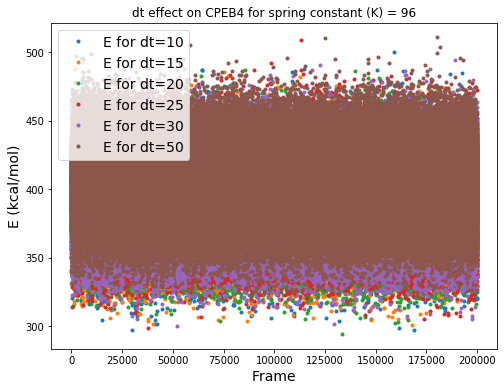

In [102]:
import analysis 
import numpy as np
import matplotlib.pyplot as plt

# dts = [10,15,20,25,30,50,100, 200]
dts = [10,15,20,25,30,50]
Uts, Kts, ts = [], [], []
for dt in dts:
    d = analysis.Analysis(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/DT/K96/{dt}');
    Uts.append(d.data[0,:,1])
    Kts.append(d.data[0,:,2])
    ts.append(d.data[0,:,0])
    
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("dt effect on CPEB4 for spring constant (K) = 96")
ax1.set_xlabel("Frame", fontsize=14)
ax1.set_ylabel("E (kcal/mol)", fontsize=14)
for i in range(len(dts)):
    ax1.plot(Uts[i]+Kts[i], '.', label=f'E for dt={dts[i]}')
ax1.legend(fontsize=14);

> Run Completed at 71.97% for CPEB4. Ran 71970000 steps for a total of 14395 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 72.64% for CPEB4. Ran 72635000 steps for a total of 14528 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 73.88% for CPEB4. Ran 73875000 steps for a total of 14776 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 70.62% for CPEB4. Ran 70625000 steps for a total of 14126 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 68.88% for CPEB4. Ran 68880000 steps for a total of 13777 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 66.61% for CPEB4. Ran 66605000 steps for a total of 13322 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


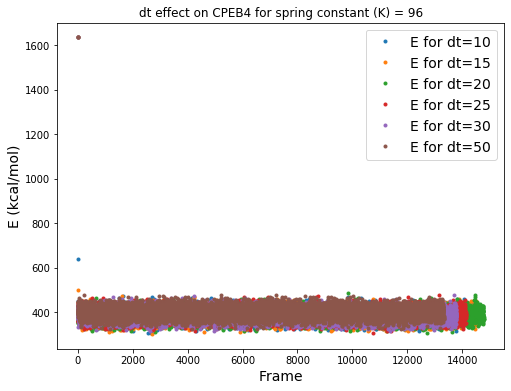

In [13]:
import analysis 
import numpy as np
import matplotlib.pyplot as plt

# dts = [10,15,20,25,30,50,100, 200]
dts = [10,15,20,25,30,50]
Uts, Kts, ts = [], [], []
for dt in dts:
    d = analysis.Analysis(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/DT/K96-v2/{dt}');
    Uts.append(d.data[0,:,1])
    Kts.append(d.data[0,:,2])
    ts.append(d.data[0,:,0])
    
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("dt effect on CPEB4 for spring constant (K) = 96")
ax1.set_xlabel("Frame", fontsize=14)
ax1.set_ylabel("E (kcal/mol)", fontsize=14)
for i in range(len(dts)):
    ax1.plot(Uts[i]+Kts[i], '.', label=f'E for dt={dts[i]}')
ax1.legend(fontsize=14);

> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 200001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


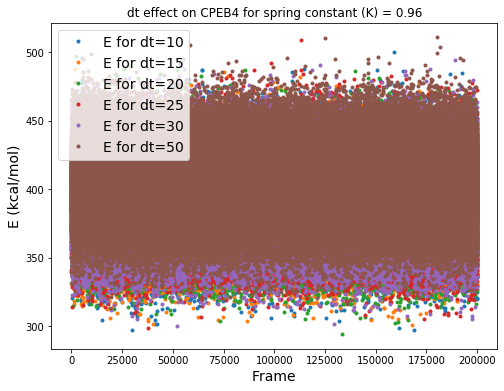

In [103]:
import analysis 
import numpy as np
import matplotlib.pyplot as plt

# dts = [10,15,20,25,30,50,100, 200]
dts = [10,15,20,25,30,50]
Uts, Kts, ts = [], [], []
for dt in dts:
    d = analysis.Analysis(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/DT/K0.96/{dt}');
    Uts.append(d.data[0,:,1])
    Kts.append(d.data[0,:,2])
    ts.append(d.data[0,:,0])
    
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("dt effect on CPEB4 for spring constant (K) = 0.96")
ax1.set_xlabel("Frame", fontsize=14)
ax1.set_ylabel("E (kcal/mol)", fontsize=14)
for i in range(len(dts)):
    ax1.plot(Uts[i]+Kts[i], '.', label=f'E for dt={dts[i]}')
ax1.legend(fontsize=14);

> Run Completed at 100.00% for CPEB4. Ran 100000000 steps for a total of 20001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


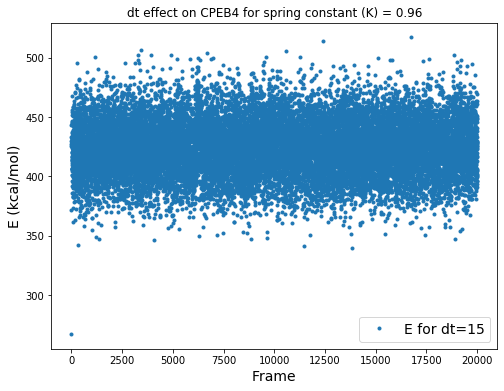

In [20]:
import analysis 
import numpy as np
import matplotlib.pyplot as plt

# dts = [10,15,20,25,30,50,100, 200]
# dts = [10,15,20,25,30,50]
dts = [15]
Uts, Kts, ts = [], [], []
for dt in dts:
    d = analysis.Analysis(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/DT/K0.96-v2/{dt}');
    Uts.append(d.data[0,:,1])
    Kts.append(d.data[0,:,2])
    ts.append(d.data[0,:,0])
    
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("dt effect on CPEB4 for spring constant (K) = 0.96")
ax1.set_xlabel("Frame", fontsize=14)
ax1.set_ylabel("E (kcal/mol)", fontsize=14)
for i in range(len(dts)):
    ax1.plot(Uts[i]+Kts[i], '.', label=f'E for dt={dts[i]}')
ax1.legend(fontsize=14);

### 4. Optimization end

Single chain and multichain simulations are behaving differently. Therefore, optimizing arount the "single chain" critical point gives very little info. What we attempt to do from now on is to optimize at the **temperatures used on the multichain** dynamics. Also because LMP processes sometimes don't die easily, a kill on all LMP processes is performed after each optimization step. This essentially means that either only **one optimization can be run at a time** or that the computer will be full of **lmp processes** (more than it can handle). Let's try to make some tests although.

Let's focus on optimization around the same temperatures where the N=150 chains case was simulated **(300K and 450K)**. 

For **12D4 vs D4** :

In [ ]:
import analysis
a_dir = '/home/adria/data/prod/lammps/12D_CPEB4_D4/1.0ls-100I-80e'
a_dir = '/home/adria/data/prod/lammps/CPEB4_D4/1.0ls-100I-80e'
T=0

opt12D = analysis.Analysis(oliba_wd=)
opt12D.minimize(a_dir=a_dir, b_dir=b_dir, T=T, method='sto', temp_dir='/home/adria/OPT',
                 I0=100e-3, l0=1., eps0=80, savefile='12D-D4stomin.txt', weight_cost_mean=1)

For **7D vs WT**

In [ ]:
import analysis
a_dir = '/home/adria/data/prod/lammps/CPEB4/1.0ls-100I-80e'
a_dir = '/home/adria/data/prod/lammps/7D_CPEB4/1.0ls-100I-80e'
T=0

opt12D = analysis.Analysis(oliba_wd=)
opt12D.minimize(a_dir=a_dir, b_dir=b_dir, T=T, method='sto', temp_dir='/home/adria/OPT',
                 I0=100e-3, l0=1., eps0=80, savefile='12D-D4stomin.txt', weight_cost_mean=1)

### 5. Parallelize and find **interchain contacts** and **density profiles**

Parallelization was done through pathos.multiprocessing. Testing is on it's way. We will do it regarding the dimer cases newly simulated : 

In [67]:
%load_ext autoreload
%autoreload 2

import plotter 

plo = plotter.Plotter(max_frames=50)
plo.index

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Protein,I,Eps,Scale,Name,FullPath
0,12D_CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/12D_CPEB4_D4/1.0l...
1,12D_CPEB4_D4x2,100,80.0,1.0,12D_CPEB4_D4x2,/home/adria/data/prod/lammps/12D_CPEB4_D4x2
2,12D_CPEB4_D4x50,100,80.0,1.0,T0,/home/adria/data/prod/lammps/12D_CPEB4_D4x50/T0
3,12D_CPEB4_D4x50,67,80.0,1.0,T1,/home/adria/data/prod/lammps/12D_CPEB4_D4x50/T1
4,7D_CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/7D_CPEB4/1.0ls-10...
5,7D_CPEB4x2,100,80.0,1.0,7D_CPEB4x2,/home/adria/data/prod/lammps/7D_CPEB4x2
6,7D_CPEB4x50,100,80.0,1.0,T0,/home/adria/data/prod/lammps/7D_CPEB4x50/T0
7,7D_CPEB4x50,67,80.0,1.0,T1,/home/adria/data/prod/lammps/7D_CPEB4x50/T1
8,CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4/1.0ls-100I-80e
9,CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4_D4/1.0ls-10...


> Run Completed at 100.00% for None. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


array([[0.        , 0.00235018, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00235018, 0.00235018, 0.00117509, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00117509, 0.        , ..., 0.        , 0.00117509,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00117509,
        0.        ],
       [0.        , 0.        , 0.00117509, ..., 0.00117509, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

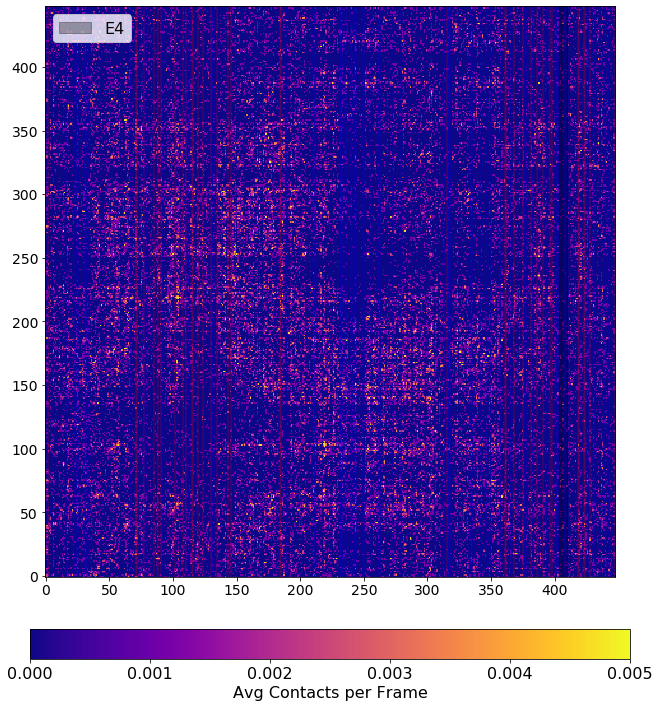

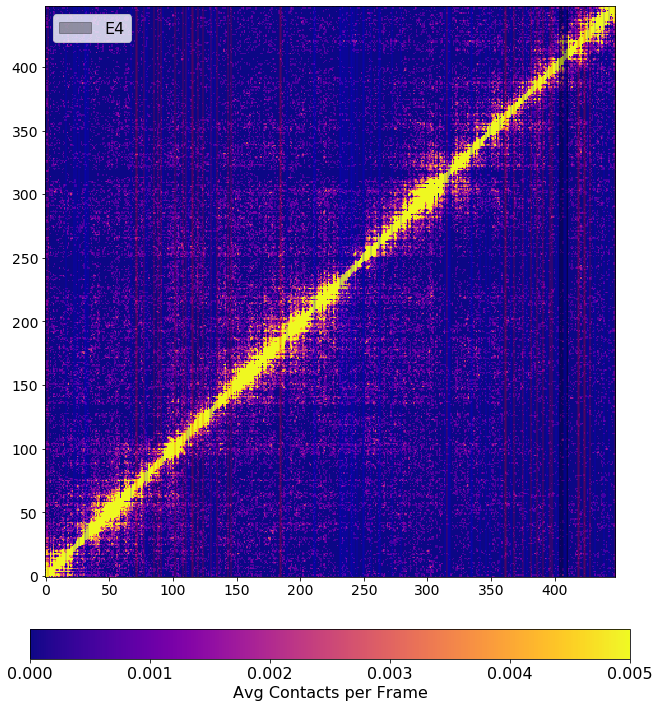

In [68]:
plo.clean()
plo.plot(observable='distance_map', index=13, contacts=True, plot_id=0, temperature=0, cmap_label='Avg Contacts per Frame')

> Run Completed at 100.00% for None. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


No handles with labels found to put in legend.
No handles with labels found to put in legend.


array([[0.        , 0.        , 0.        , ..., 0.        , 0.00117509,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00117509, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00117509, ..., 0.        , 0.        ,
        0.        ],
       [0.00117509, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

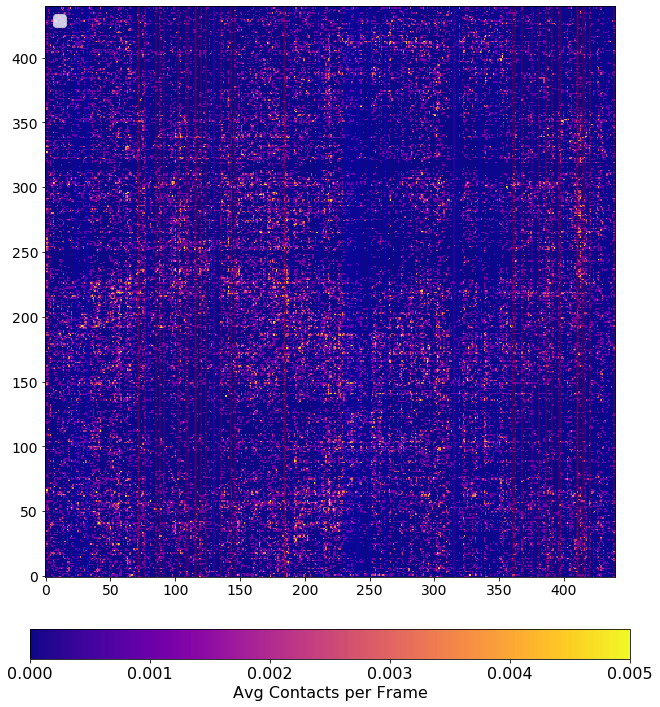

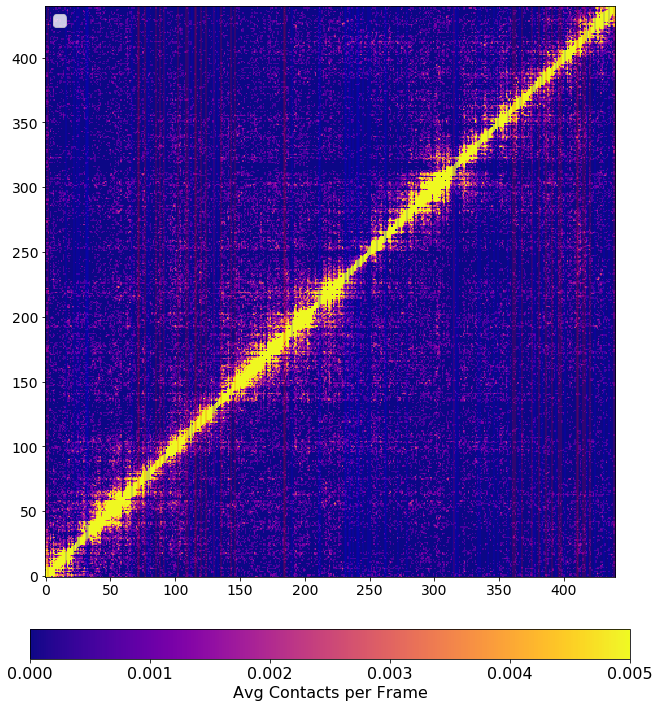

In [69]:
plo.clean()
plo.plot(observable='distance_map', index=10, contacts=True, plot_id=1, temperature=0, cmap_label='Avg Contacts per Frame')

> Run Completed at 100.00% for None. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


array([[0.        , 0.        , 0.        , ..., 0.00117509, 0.00117509,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00117509, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00117509],
       [0.00117509, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00117509, 0.        ,
        0.        ]])

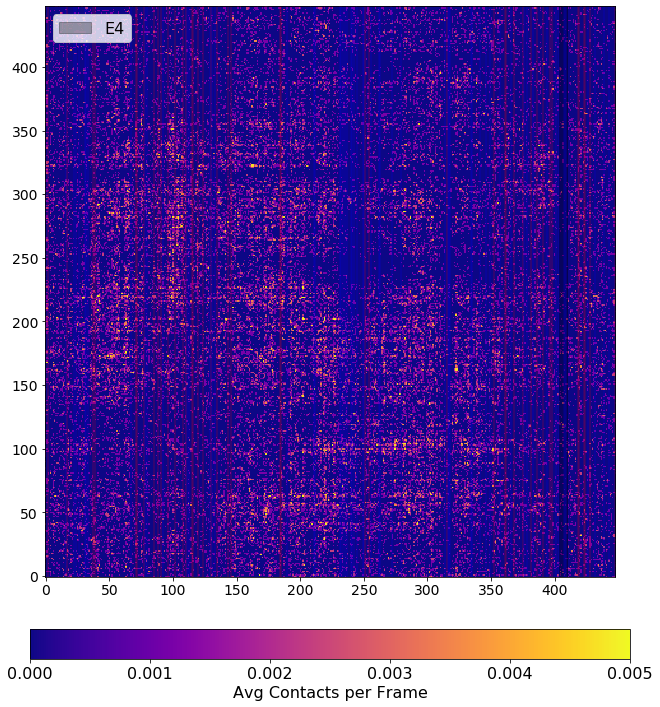

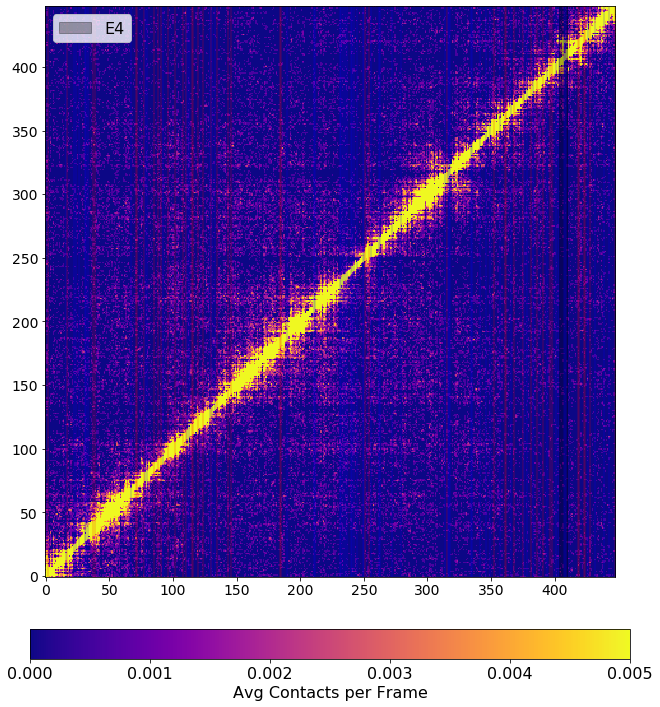

In [70]:
plo.clean()
plo.plot(observable='distance_map', index=5, contacts=True, plot_id=2, temperature=0, cmap_label='Avg Contacts per Frame')

> Run Completed at 100.00% for None. Ran 100000000 steps for a total of 2001 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


No handles with labels found to put in legend.
No handles with labels found to put in legend.


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00235018],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00235018, 0.        , ..., 0.        , 0.        ,
        0.        ]])

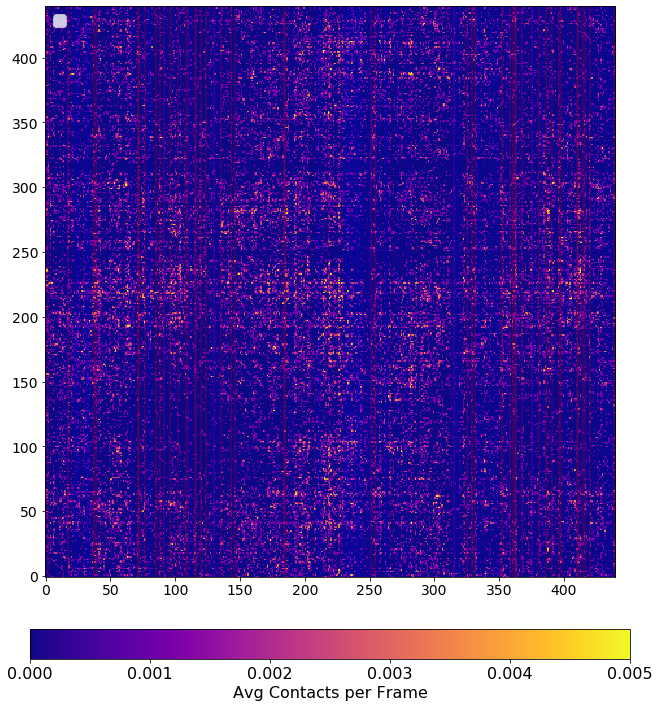

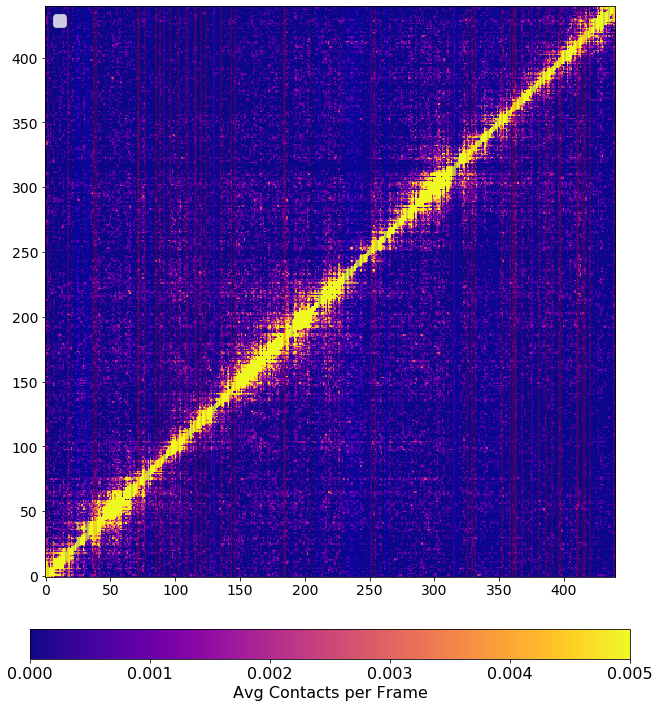

In [71]:
plo.clean()
plo.plot(observable='distance_map', index=1, contacts=True, plot_id=3, temperature=0, cmap_label='Avg Contacts per Frame')

### 6. HOOMD testing


**MOVED TO NEXT WEEK**

### 7. TDP mutagenesis

The analysis was done with the following code. Essentially rerun a large TDP simulation without skipping frames and considering only the last **1500 frames**. This is done using the **Rg's that were proposed by LAMMPS**. To consider the **reweighting case**, go to the **end of the notebook**.

In [17]:
import analysis
residues = 'GAVLMIFYWKRHDESTCNQP'
seq = 'GNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNS'

temp_dir = '/home/adria/TDP'
T=3

tdp = analysis.Analysis(oliba_wd='/home/adria/data/prod/lammps/TDP-BIG')
shutil.copyfile(os.path.join(tdp.o_wd, f'reorder-{T}.lammpstrj'), os.path.join(temp_dir, f'atom_traj_tdp.lammpstrj'))

print("iRg", tdp.rg().mean(axis=1)[3])
seqs, rgs, lrgs = [], [], []
for i in range(len(seq)):
    for r in residues:
        new_seq = seq[:i] + r + seq[i + 1:]
        rerun_rg, lmp_rg = tdp.topo_minimize(T=T, new_seq=new_seq, temp_dir=temp_dir)
        rgs.append(rerun_rg)
        seqs.append(new_seq)
        lrgs.append(lmp_rg)
        with open("/home/adria/scripts/data/TDP.txt", 'a+') as seqf:
            seqf.write(f'{rerun_rg} {lmp_rg} {new_seq}\n')

> Run Completed at 2.59% for TDP43. Ran 25905000 steps for a total of 5182 frames 
> Taking frames every 2 for a total of 1000 to avoid strong correlations


NameError: name 'shutil' is not defined

The results should be represented in the way that Benni did on her paper, that is a matrix of all possible mutations. The results are currently at my home at ***/home/adria/TDP.txt***. Let's try to analyze it

In [1]:
import pandas as pd
seq='GNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNS'
mutations='GAVLMIFYWKRHDESTCNQP'
og_rg = 30.240521244666667
data = pd.read_csv('/home/adria/TDP.txt', sep=" ", header=None)
r = data[1].values
r = 100*(r.reshape(len(seq), len(mutations)).T - og_rg)/og_rg

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,12))
img = ax.imshow(r, cmap='bwr', vmin=-0.07, vmax=0.07)

ax.set_title("TDP mutagenesis by HPS model")
ax.set_xticks(range(len(seq)))
ax.set_yticks(range(len(mutations)))
ax.set_yticklabels(list(mutations));
ax.set_xticklabels(list(seq));
ax.set_ylim(r.shape[0]-0.5, -0.5)

cb = plt.colorbar(img, orientation='horizontal', fraction=0.046, pad=0.08)
cb.set_label("Rg Relative change with respect to WT (%)", fontsize=14)
cb.ax.tick_params(labelsize=12)

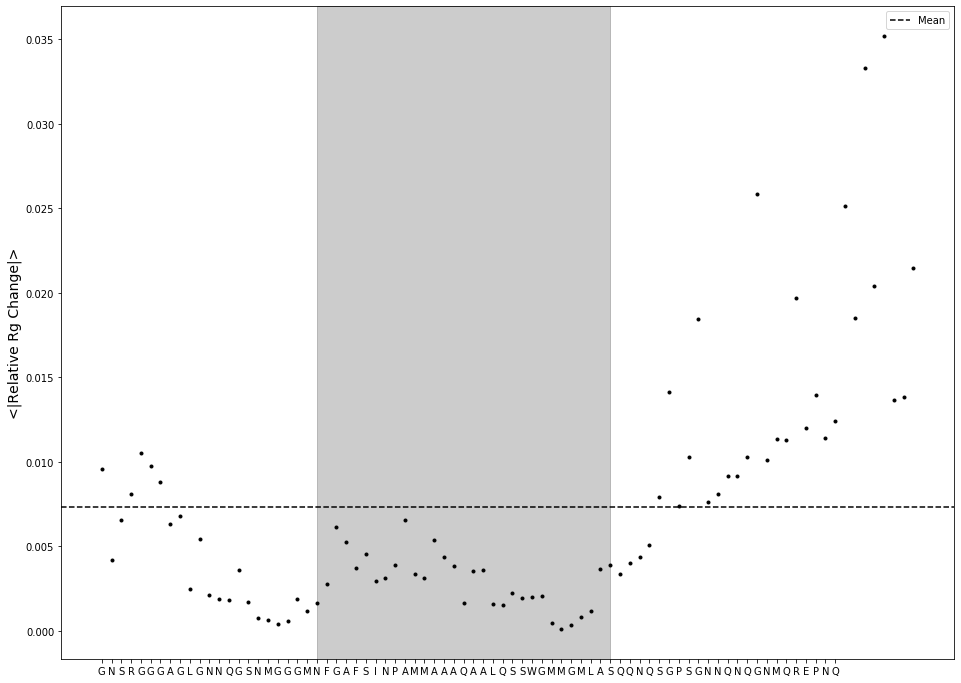

In [3]:
import numpy as np
fig, ax = plt.subplots(figsize=(16,12))
plt.ylabel("<|Relative Rg Change|>", fontsize=14)
ax.plot(np.abs(r).mean(axis=0), '.', color='black')
ax.set_xticks(range(0, 76, 1))
ax.set_xticklabels(list(seq[:76]));
ax.axhline(np.abs(r).mean(axis=0).mean(axis=0), ls='--', label='Mean', color='black')
ax.axvspan(312-290, 342-290, color='black', alpha=0.2)
ax.legend()

Now for the **reweighted case**

In [8]:
import pandas as pd
import numpy as np

seq='GNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNS'
mutations='GAVLMIFYWKRHDESTCNQP'
og_rg = 30.547879912124642
data = pd.read_csv('/home/adria/TDPrew.txt', sep=" ", header=None)
rgs = data[2].values
neffs = data[3].values

Consider now only those rg's where neff < 0.1. Then :

In [9]:
rg_masked = rgs.copy()
rg_masked[np.where(neffs<0.1)] = np.nan
r2 = 100*(rg_masked.reshape(len(seq), len(mutations)).T - og_rg)/og_rg

(1680,)


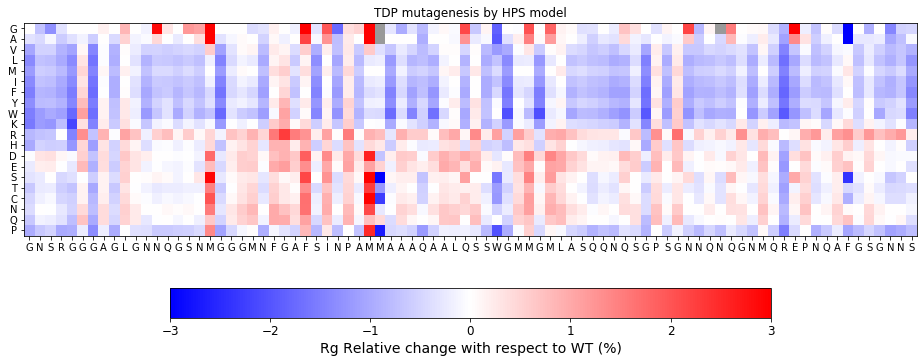

In [10]:
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots(figsize=(16,12))

cmap = matplotlib.cm.get_cmap('bwr')
cmap.set_bad('black', alpha=0.4)
img = ax.imshow(r2, cmap=cmap, vmin=-3, vmax=3)

ax.set_title("TDP mutagenesis by HPS model")
ax.set_xticks(range(len(seq)))
ax.set_yticks(range(len(mutations)))
ax.set_yticklabels(list(mutations));
ax.set_xticklabels(list(seq));
ax.set_ylim(r2.shape[0]-0.5, -0.5)
cb = plt.colorbar(img, orientation='horizontal', fraction=0.046, pad=0.08)
cb.set_label("Rg Relative change with respect to WT (%)", fontsize=14)
cb.ax.tick_params(labelsize=12)

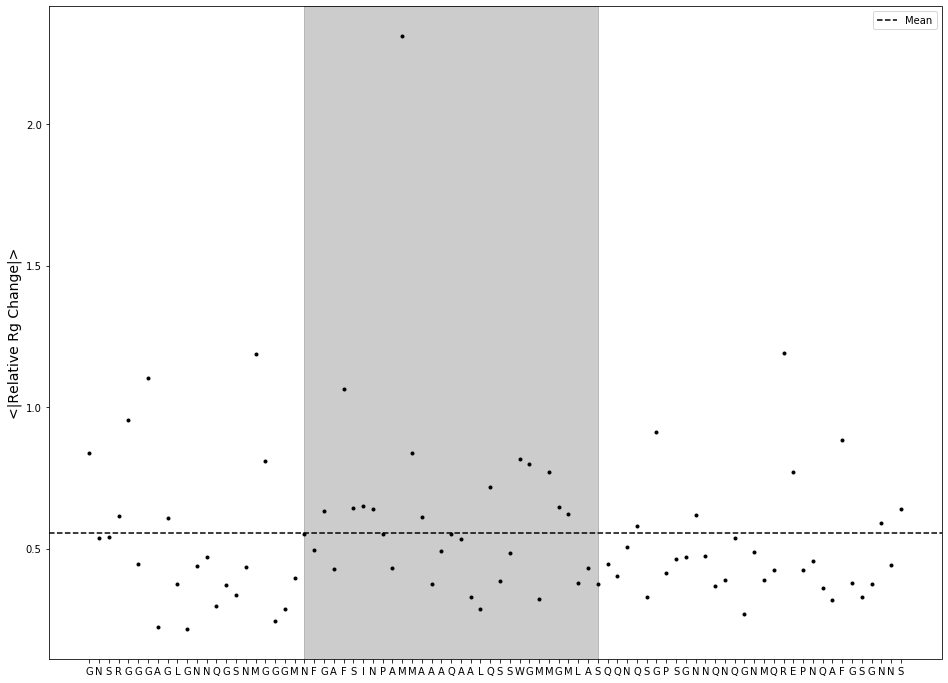

In [34]:
import numpy as np
rt = np.nan_to_num(r2,nan=0, copy=True)
# print(np.nan_to_num(r2,nan=0, copy=True))
fig, ax = plt.subplots(figsize=(16,12))
plt.ylabel("<|Relative Rg Change|>", fontsize=14)
ax.plot(np.abs(rt).mean(axis=0), '.', color='black')
ax.set_xticks(range(0, len(seq)))
ax.set_xticklabels(list(seq));
ax.axhline(np.abs(rt).mean(axis=0).mean(axis=0), ls='--', label='Mean', color='black')
ax.axvspan(312-290, 342-290, color='black', alpha=0.2)
ax.legend()

NameError: name 'n' is not defined

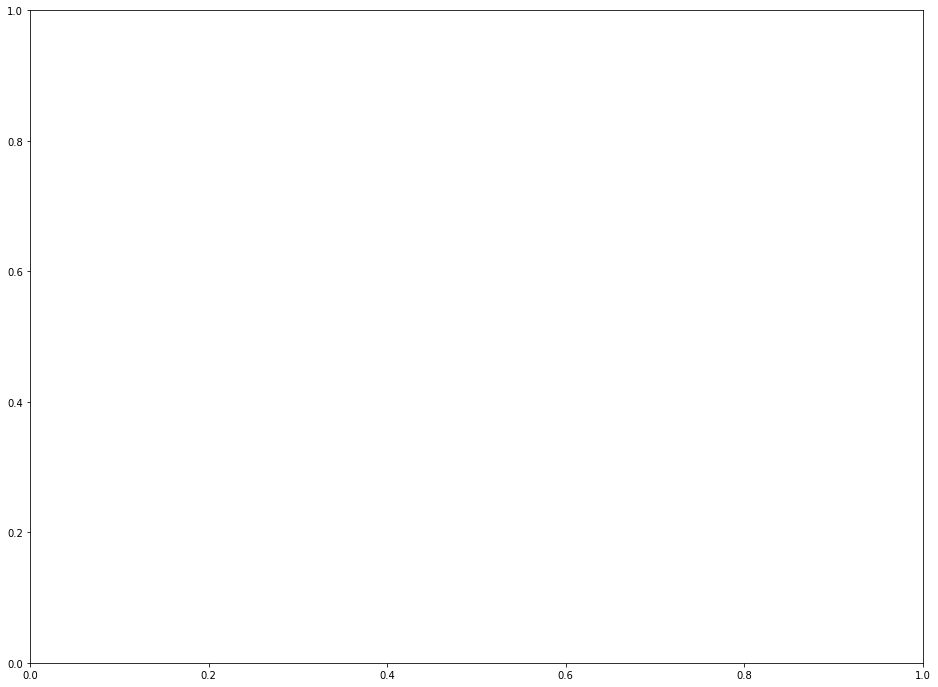

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,12))
img = ax.imshow(n, vmin=0, vmax=1)

ax.set_title("TDP mutagenesis by HPS model")
ax.set_xticks(range(len(seq)))
ax.set_yticks(range(len(mutations)))
ax.set_yticklabels(list(mutations));
ax.set_xticklabels(list(seq));
cb = plt.colorbar(img, orientation='horizontal', fraction=0.046, pad=0.08)
cb.set_label("Neff", fontsize=14)
cb.ax.tick_params(labelsize=12)